# Estatística Descritiva


In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [39]:
import os

os.getcwd()

'c:\\PythonDSA\\Conceitos'

In [40]:
df = pd.read_csv('arquivos/imoveis.csv')

df.head()

,valor_aluguel,area_m2,ano_construcao,codigo_localidade,numero_banheiros,numero_cozinhas,codigo_bairro
0,120.97436,35,1939,1,0,0,1112
1,436.97433,104,1939,1,1,0,1112
2,355.74360,29,1971,2,0,0,2114
3,282.92310,39,1972,2,0,0,2148
4,807.23080,97,1985,1,0,0,2222


## Análise Exploratória - Resumo Estatístico    

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   valor_aluguel      3000 non-null   float64
 1   area_m2            3000 non-null   int64  
 2   ano_construcao     3000 non-null   int64  
 3   codigo_localidade  3000 non-null   int64  
 4   numero_banheiros   3000 non-null   int64  
 5   numero_cozinhas    3000 non-null   int64  
 6   codigo_bairro      3000 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 164.2 KB


In [42]:
# Transfirmando codigo de bairro para categórico
df['codigo_bairro'] = df['codigo_bairro'].astype('category')


In [43]:
# Verificar se há valores nulos
df.isnull().sum()

valor_aluguel        0
area_m2              0
ano_construcao       0
codigo_localidade    0
numero_banheiros     0
numero_cozinhas      0
codigo_bairro        0
dtype: int64

In [44]:
# Resumo Estatístico
df.describe()

,valor_aluguel,area_m2,ano_construcao,codigo_localidade,numero_banheiros,numero_cozinhas
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,459.643146,67.363333,1956.321333,1.441000,0.061333,0.042000
std,195.865692,23.675758,22.288136,0.545238,0.239981,0.200623
min,40.512820,20.000000,1918.000000,1.000000,0.000000,0.000000
25%,320.961530,51.000000,1939.000000,1.000000,0.000000,0.000000
50%,426.897435,65.000000,1959.000000,1.000000,0.000000,0.000000
75%,560.282055,81.000000,1972.000000,2.000000,0.000000,0.000000
max,1843.384600,160.000000,1997.000000,3.000000,1.000000,1.000000


In [45]:
# Resumo do valor de aluguel
df['valor_aluguel'].describe()

count    3000.000000
mean      459.643146
std       195.865692
min        40.512820
25%       320.961530
50%       426.897435
75%       560.282055
max      1843.384600
Name: valor_aluguel, dtype: float64

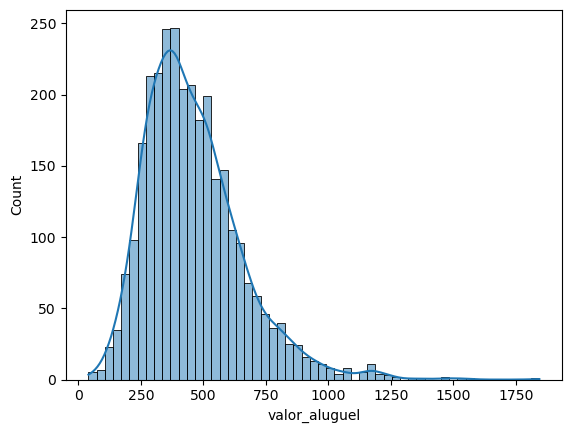

In [46]:
sns.histplot(data = df, x = 'valor_aluguel', 
              kde = True)
plt.show()

In [47]:
# Matriz de correlação
df.corr()

,valor_aluguel,area_m2,ano_construcao,codigo_localidade,numero_banheiros,numero_cozinhas
valor_aluguel,1.000000,0.584878,0.139194,0.172368,0.250261,0.170707
area_m2,0.584878,1.000000,-0.226581,0.110046,0.226306,0.045716
ano_construcao,0.139194,-0.226581,1.000000,-0.152206,0.065824,0.109881
codigo_localidade,0.172368,0.110046,-0.152206,1.000000,0.037858,-0.004774
numero_banheiros,0.250261,0.226306,0.065824,0.037858,1.000000,0.064216
numero_cozinhas,0.170707,0.045716,0.109881,-0.004774,0.064216,1.000000


In [48]:
df.corr()['valor_aluguel'].sort_values(ascending = False)

valor_aluguel        1.000000
area_m2              0.584878
numero_banheiros     0.250261
codigo_localidade    0.172368
numero_cozinhas      0.170707
ano_construcao       0.139194
Name: valor_aluguel, dtype: float64

A maior correlação observada foi entre valor de aluguel e área.

In [49]:
# Para calcular somente a correlação entre área e valor de aluguel
df.corr()['valor_aluguel']['area_m2']

0.5848780677553321